<a href="https://colab.research.google.com/github/hallowerised/Twitter-Sentiment-Analysis/blob/main/Copy_of_twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
uploaded = files.upload()

Saving training.csv to training.csv


In [ ]:
train = pd.read_csv('training.csv', on_bad_lines='skip')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
sentiment = { 1: 'Hate', 0: 'Non-Hate'}
def label_decoder(label):
    return sentiment[label]

train.label = train.label.apply(lambda x : label_decoder(x))
train.head(10)

,id,label,tweet
0,1,Non-Hate,@user when a father is dysfunctional and is s...
1,2,Non-Hate,@user @user thanks for #lyft credit i can't us...
2,3,Non-Hate,bihday your majesty
3,4,Non-Hate,#model i love u take with u all the time in ...
4,5,Non-Hate,factsguide: society now #motivation
5,6,Non-Hate,[2/2] huge fan fare and big talking before the...
6,7,Non-Hate,@user camping tomorrow @user @user @user @use...
7,8,Non-Hate,the next school year is the year for exams.ð...
8,9,Non-Hate,we won!!! love the land!!! #allin #cavs #champ...
9,10,Non-Hate,@user @user welcome here ! i'm it's so #gr...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


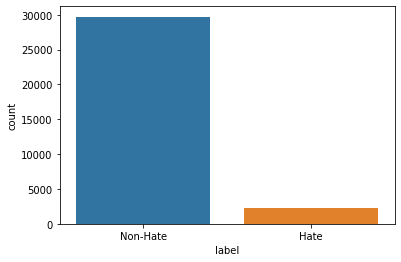

In [ ]:

plt.figure()
sns.countplot(train['label'])

In [ ]:
stop_words = stopwords.words('english')
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
stemmer = SnowballStemmer('english')
text_cleaning_re = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'

In [ ]:
def preprocess(text, stem = False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens =[]
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return ' '.join(tokens)

In [ ]:
train.tweet[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [ ]:
preprocess(train.tweet[0], True)



'user father dysfunct selfish drag kid dysfunct run'

In [ ]:
uploaded2 = files.upload()

Saving test.csv to test.csv


In [ ]:
print('size of training data :', len(train))
test = pd.read_csv('test.csv', on_bad_lines='skip')

print('size of testing data :',len(test))

size of training data : 31962
size of testing data : 17197


In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.tweet)

word_index = tokenizer.word_index
vocab_size = len(word_index)
print('VOCAB_SIZE :', vocab_size)

VOCAB_SIZE : 45889


In [ ]:
!pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_preprocessing.sequence import pad_sequences

Max_NB_words = 100000
Max_sq_length = 30
x_train = pad_sequences(tokenizer.texts_to_sequences(train.tweet), maxlen = Max_sq_length)
x_test = pad_sequences(tokenizer.texts_to_sequences(test.tweet), maxlen = Max_sq_length)

print('training x shape :', x_train.shape)
print('testing x shape :', x_test.shape)

training x shape : (31962, 30)
testing x shape : (17197, 30)


In [ ]:
encoder = LabelEncoder()
encoder.fit(train.label.to_list())

y_train = encoder.transform(train.label.tolist())


print('y_train shape :', y_train.shape)


y_train shape : (31962,)


In [ ]:
y_train = y_train.reshape(31962,1)
print('y_train shape :', y_train.shape)


y_train shape : (31962, 1)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-12-20 19:39:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-20 19:39:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-20 19:39:16--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov